# Machine Learning (laboratory instruction)
## Linear regression (part 5)


### The goal
Implementation of multivariate linear regression for house price prediction.

### Dataset
Read the data from `houses.npz` file. This is a multivariate data with information about the house (flats) prices. The columns in $x$ contain following information, respectively:
* the area,
* distance to city centre,
* standard,
* distance to highway.

The $y$ contains the price of the flat.


### Task. Implement the multivariate linear regression.
Implement linear regression function $f$ that takes variable number of parameters. This is simply a weighted sum of input features, plus a constant (the bias).

$$
\begin{equation*}
f_\theta(x) = \theta_0x_0 + \theta_1x_1 + \cdots + \theta_{n-1}x_{n-1} + \theta_{n}x_n
\label{eq:fun} \tag{1}
\end{equation*}
$$

, where $\theta$ are the model parameters (parameter vector), $x$ are the features (feature vector), $n$ is the number of features. Note that $\theta_0x_0$ (depending on the implementation) represents the bias where the $x_0$ always equals 1 and $\theta_0$ is the actual bias.

To add a column with only ones you can use `hstack` function: `np.hstack((np.ones(len(x)).reshape(-1, 1), x))`.

In this case you will have to calculate the partial derivatives for all the parameters. The vector which contains all the partial derivatives is called gradient:

$$
\begin{equation*}
\nabla = \bigg{\lgroup}\frac{\partial}{\partial \theta_0 MSE(\theta)}, \frac{\partial}{\partial \theta_1 MSE(\theta)}, \cdots, \frac{\partial}{\partial \theta_n MSE(\theta)}\bigg{\rgroup}
\label{eq:gradient} \tag{2}
\end{equation*}
$$

The next step can then be calculated by following formula:

$$
\begin{equation*}
\theta' = \theta - \alpha\nabla_\theta MSE(\theta)
\label{eq:nextstep} \tag{3}
\end{equation*}
$$

It can be even written as simplified formula:

$$
\begin{equation*}
\theta_j := \theta_j - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}
\label{eq:nextstepsimple} \tag{4}
\end{equation*}
$$

, where $j$ is the number of features, $\alpha$ is the learning rate, and $m$ is the number of samples.


#### Vectorized form.

It is likely that the implementation of above will work very slowly if implemented iteratively. Implement the solution using vectorized form. In this case the equation $\eqref{eq:fun}$ can be done by vector multiplication:

$$
\begin{equation*}
f_\theta(x) =\begin{bmatrix}\theta_0 \hspace{2em} \theta_1 \hspace{2em} ... \hspace{2em} \theta_n\end{bmatrix}\begin{bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix}= \theta^T x
\label{eq:funvec} \tag{5}
\end{equation*}
$$

Thus, the cost function is:

$$
\begin{equation*}
MSE = \frac{1}{m}\sum(\theta^Tx^{(i)} - y^{(i)})^2
\label{eq:costvec} \tag{6}
\end{equation*}
$$

And the partial derivatives can be calculated as follows:

$$
\begin{equation*}
\frac{\partial}{\partial\theta_j}MSE = \frac{2}{m}\sum(\theta^Tx^{(i)} - y^{(i)})x_j^{(i)}
\label{eq:dervec} \tag{7}
\end{equation*}
$$

Now, we can define the gradient:

$$
\begin{equation*}
\nabla = \frac{2}{m}x^T(X\theta - y)
\label{eq:gradientvec} \tag{8}
\end{equation*}
$$

Remark: There is possibility that your calculation may differ if you use different shapes of the vectors.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

with open('houses.npz', 'rb') as f:
    data = np.load(f)
    x, y = data['x'], data['y']
    
# Adding a column with only ones
x = np.hstack((np.ones(len(x)).reshape(-1, 1), x))   

In [2]:
# Defining a function to create sum of weighted input features for every row
def fun(weight):
    weights = []
    for i in range(len(x)):
        weights.append(weight.T @ x[i])
    return weights

# Defining gradient
def gradient(weight, alpha):
    grad = 2/len(y)*x.T @ (fun(weight) - y)
    return weight-alpha*grad

# Defining an array of steps for weight calculation
def step(weight, epochs, alpha):
    step_list = []
    for i in range(epochs):
        step_list.append(weight)
        weight = gradient(weight, alpha)
    return step_list

# Defining linear regression function
def linear_regression(weight, epoch, alpha):
    weight_value = step(weight, epoch, alpha)
    return weight_value[-1]

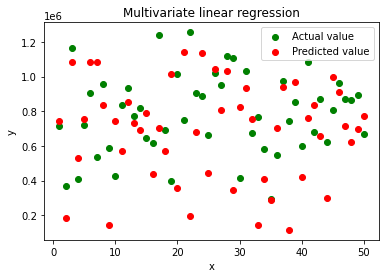

In [3]:
# Setting start values of weights, learning rate and number of epochs
start_weight = np.zeros(len(x[0]))
alpha = 0.000000000005
epochs = 250000

weight = linear_regression(start_weight, epochs, alpha)
predictions = fun(weight)

plt.title("Multivariate linear regression")
plt.xlabel("x")
plt.ylabel("y")
plot_1 = plt.scatter(range(1,len(x)+1), y, color="green")
plot_2 = plt.scatter(range(1,len(x)+1), predictions, color="red")
plt.legend((plot_1, plot_2), ("Actual value", "Predicted value"))
plt.show()

In [4]:
import pandas as pd
pd.DataFrame({'y':y, 'y\'': np.round(predictions)})

,y,y'
0,714000.0,742771.0
1,367000.0,186107.0
2,1166000.0,1082922.0
3,412000.0,533153.0
4,720000.0,755862.0
5,903000.0,1081914.0
6,537000.0,1082737.0
7,960000.0,838372.0
8,587000.0,144594.0
9,425000.0,745315.0
